In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [239]:
btc_15m = pd.read_csv ('./btc_15m.csv', encoding='unicode_escape')

In [240]:
btc_15m.shape

(9735, 14)

In [241]:
btc_15m = btc_15m[4000:]
len(btc_15m)

5735

In [242]:
btc_15m['time'] = btc_15m['time'].str.extract('(\d{4}-\d{2}-\d{2}\w\d{2}:\d{2}:\d{2})', expand=True)
btc_15m['time'] = pd.to_datetime(btc_15m["time"])
btc_15m.set_index("time", inplace = True)

In [243]:
def Buy_RSI(btc_15m):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_15m)):
    if (btc_15m ['RSI'][i] < 20):
      if flag != 1:
        sigPriceBuy.append(btc_15m['close'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_15m ["RSI"][i] > 45):
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_15m["close"][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [244]:
Buy_RSI = Buy_RSI(btc_15m)
btc_15m['Long Signal RSI'] = Buy_RSI[0]
btc_15m['Close Long Signal RSI'] = Buy_RSI[1]
# To show the data
btc_15m.head()

,close,Volume,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 1,Lower ATR 1,Upper ATR 3,Lower ATR 3,K,RSI,Long Signal RSI,Close Long Signal RSI
time,,,,,,,,,,,,,,,
2022-09-27 21:45:00,19071.5,2744.241,19077.37677,19300.80383,19483.73426,19611.54091,19612.85254,19448.04461,19153.56305,19742.52617,18859.08148,87.660220,31.950595,NaN,NaN
2022-09-27 22:00:00,19084.0,2199.511,19078.84860,19281.09439,19460.89230,19592.70016,19602.38021,19424.31797,19137.87081,19710.76514,18851.42364,92.883673,32.879617,NaN,NaN
2022-09-27 22:15:00,19012.0,2293.322,19063.99336,19256.63126,19435.24131,19571.96087,19590.68951,19396.83888,19116.42365,19677.25410,18836.00842,92.461342,30.312582,NaN,NaN
2022-09-27 22:30:00,18966.5,1675.084,19042.32817,19230.25569,19408.45609,19550.33727,19578.32932,19365.73419,19094.77720,19636.69119,18823.82020,86.893412,28.783227,NaN,NaN
2022-09-27 22:45:00,19066.5,968.253,19047.69968,19215.36881,19388.91574,19533.05736,19568.19409,19348.34885,19082.38878,19614.30891,18816.42871,87.403318,36.380360,NaN,NaN


In [245]:
btc_15m.describe()

,close,Volume,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 1,Lower ATR 1,Upper ATR 3,Lower ATR 3,K,RSI,Long Signal RSI,Close Long Signal RSI
count,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5.735000e+03,5735.000000,6.000000,7.000000
mean,18857.087881,1810.697187,18858.617277,18861.881865,18865.530282,18871.506881,18883.577351,18928.924590,18794.839140,19063.010041,18660.753690,5.025893e+01,49.525709,18763.916667,19132.142857
std,1556.648374,3057.582697,1553.719332,1549.156608,1544.725371,1537.266803,1519.840854,1540.934233,1558.935980,1529.256182,1583.045703,3.050543e+01,10.355466,1545.612610,1315.910671
min,15632.500000,78.067000,15711.060560,15736.575380,15757.135210,15787.765520,15869.890500,15792.017280,15679.257550,15902.901090,15174.543140,-2.960000e-14,13.693656,16437.000000,16882.500000
25%,16884.250000,532.404000,16876.742035,16873.405915,16872.112650,16865.256185,17007.378635,16967.274740,16793.506965,17227.285095,16655.027165,2.226877e+01,43.035794,17953.750000,18640.250000
50%,19249.000000,966.592000,19252.867760,19247.951960,19259.880420,19278.687240,19299.540970,19310.905900,19186.460330,19395.488480,19115.739740,5.066546e+01,49.093677,18948.250000,19146.000000
75%,20085.500000,1899.027500,20073.745290,20073.044090,20076.111220,20072.168775,20053.544450,20166.595415,19980.663520,20340.632800,19826.584165,7.797126e+01,55.730178,19582.375000,19784.500000
max,21444.500000,70768.354000,21397.969050,21365.925620,21321.677970,21298.381490,21240.912680,21405.652910,21327.470420,21506.773100,21250.560010,1.000000e+02,93.411165,20834.000000,21047.000000


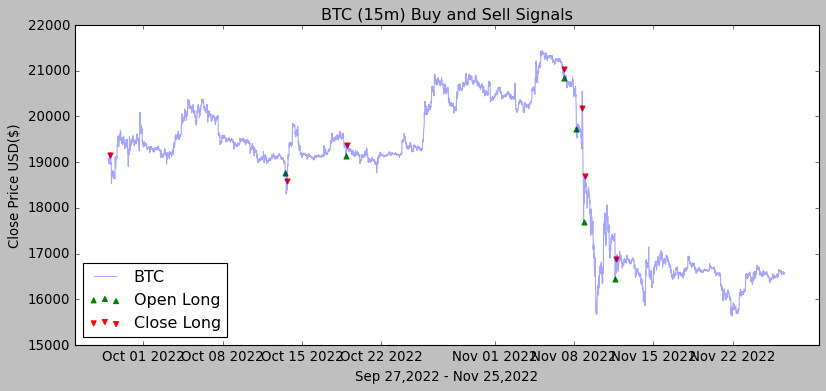

In [255]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(btc_15m['close'], label='BTC', alpha=0.35)
plt.plot(btc_15m['Long Signal RSI'], label='', alpha=0.35)
plt.plot(btc_15m['Close Long Signal RSI'],label='', alpha=0.35)
plt.scatter(btc_15m.index, btc_15m['Long Signal RSI'], label ='Open Long', marker='^',color='green')
plt.scatter(btc_15m.index, btc_15m['Close Long Signal RSI'],label='Close Long', marker='v', color='red')
plt.title('BTC (15m) Buy and Sell Signals')
plt.xlabel("Sep 27,2022 - Nov 25,2022")
plt.ylabel("Close Price USD($)")
plt.legend(loc='lower left')
plt.show()

In [247]:
def Sell_RSI(btc_15m):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_15m)):
    if (btc_15m ['RSI'][i] > 73):
      if flag != 1:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_15m['close'][i])
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_15m ["RSI"][i] < 33):
      if flag != 0:
        sigPriceBuy.append(btc_15m["close"][i])
        sigPriceSell.append(np.nan)
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceSell, sigPriceBuy)

In [248]:
Sell_RSI = Sell_RSI(btc_15m)
btc_15m['Short Signal RSI'] = Sell_RSI[0]
btc_15m['Close Short Signal RSI'] = Sell_RSI[1]
# To show the data
btc_15m.head()

,close,Volume,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 1,Lower ATR 1,Upper ATR 3,Lower ATR 3,K,RSI,Long Signal RSI,Close Long Signal RSI,Short Signal RSI,Close Short Signal RSI
time,,,,,,,,,,,,,,,,,
2022-09-27 21:45:00,19071.5,2744.241,19077.37677,19300.80383,19483.73426,19611.54091,19612.85254,19448.04461,19153.56305,19742.52617,18859.08148,87.660220,31.950595,NaN,NaN,NaN,19071.5
2022-09-27 22:00:00,19084.0,2199.511,19078.84860,19281.09439,19460.89230,19592.70016,19602.38021,19424.31797,19137.87081,19710.76514,18851.42364,92.883673,32.879617,NaN,NaN,NaN,NaN
2022-09-27 22:15:00,19012.0,2293.322,19063.99336,19256.63126,19435.24131,19571.96087,19590.68951,19396.83888,19116.42365,19677.25410,18836.00842,92.461342,30.312582,NaN,NaN,NaN,NaN
2022-09-27 22:30:00,18966.5,1675.084,19042.32817,19230.25569,19408.45609,19550.33727,19578.32932,19365.73419,19094.77720,19636.69119,18823.82020,86.893412,28.783227,NaN,NaN,NaN,NaN
2022-09-27 22:45:00,19066.5,968.253,19047.69968,19215.36881,19388.91574,19533.05736,19568.19409,19348.34885,19082.38878,19614.30891,18816.42871,87.403318,36.380360,NaN,NaN,NaN,NaN


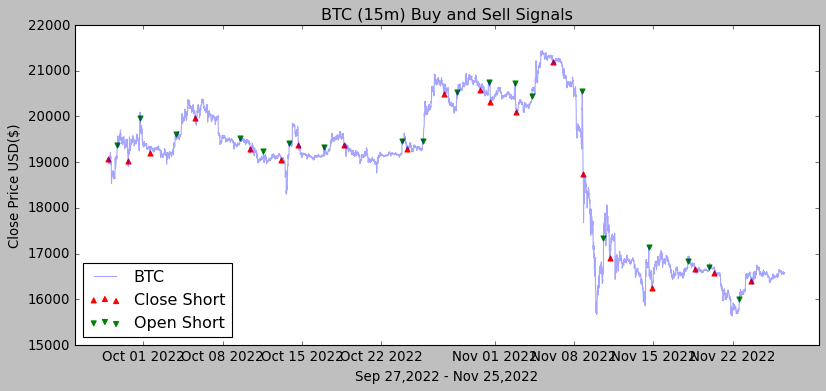

In [254]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(btc_15m['close'], label='BTC', alpha=0.35)
plt.plot(btc_15m['Close Short Signal RSI'], label='', alpha=0.35)
plt.plot(btc_15m['Short Signal RSI'],label='', alpha=0.35)
plt.scatter(btc_15m.index, btc_15m['Close Short Signal RSI'], label ='Close Short', marker='^',color='red')
plt.scatter(btc_15m.index, btc_15m['Short Signal RSI'],label='Open Short', marker='v', color='green')
plt.title('BTC (15m) Buy and Sell Signals')
plt.xlabel("Sep 27,2022 - Nov 25,2022")
plt.ylabel("Close Price USD($)")
plt.legend(loc='lower left')
plt.show()